# Introduction

Last week we made a connection between temperature and Antarctic seaice.
This week we want to answer a few questions:

    1) How are the different temperatures measured?
    
        a) What are the differences between the different temperatures?
        b) Is temperature meausred in the same way as Sea Ice?
        c) If the answers to the above are satisfactory, can we justify temperature causing ice to melt.
        d) Can we validate temperature using data from argo floats and station data?
        
    2) Can we predict Temperature using other variables? 
            - NB we made a start at this last week but want to formalise it more.
        
        a) Radiation: LW/SW net/outgoing. (By extention cloud cover)
        b) Ozone concentration.
        b) Climate Indicies: We have a range to look at, but we are interested in SAM and IPO.
        c) Environmental variables: wind speed surface pressure and the like.
        
These other variables may be related to each other and we will need to keep this in mind as we go about our analysis.

To begin with, I will include some notes on Question 1 in Markdown at the start of this notebook, along with any related calculations. This will be followed up by related calculations and results for Question 2. If things get too complicated or messy I will make an external latex document to accompany these results.

Additionally I want to make sure I acquire 

In [1]:
%run import.py
%load_ext autoreload
%autoreload 2

# 1 Validation of Temperature 

## Description of Different Temperatures

### Sea Surface Temperature

[Description from documentation](https://apps.ecmwf.int/codes/grib/param-db?id=34): This is caclulated from a variety of sources including satilites and sometimes data from [NEMO forecasts](https://www.nemo-ocean.eu/).

One issue we have with SST is that we are unsure how data is derrived for SST when ice is covering the ocean. we'll investigate this shortly to check that we have data at this time. [This report](https://www.ecmwf.int/en/elibrary/16555-sea-surface-temperature-and-sea-ice-concentration-era5) seemed relevant but on reading it I'm not sure if it answers our question. (Including it still because it has useful information about SST and SIC from different sources). **This question remains unanswered as of yet**

"The ENS system evolves the SST and sea ice using the NEMO model" is quoted from page 161 of [this report](https://www.ecmwf.int/sites/default/files/elibrary/2016/17117-part-iv-physical-processes.pdf). I think what this means is that the NEMO model is used to calculate SST when there is seaice cover.

"The ocean skin temperature is not always the same as the bulk SST. A very shallow layer (less then 1
mm thick) is cooler because of the turbulent and long wave radiative heat loss to the atmosphere which
has to be compensated for by the inefficient molecular transport in the water skin. Solar radiation has
only a small effect on the cool skin because the solar absorption in such a thin layer is small. However,
at low winds, solar radiation can create a so-called warm layer with a depth of a few metres"

### 2m Temperature

[Description from documentation](https://apps.ecmwf.int/codes/grib/param-db?id=167): 2m temperature is calculated by interpolating between the lowest model level and the Earth's surface, taking account of the atmospheric conditions.

### Skin Temperature

[Description from documentation](https://apps.ecmwf.int/codes/grib/param-db?id=235): The skin temperature is the theoretical temperature that is required to satisfy the surface energy balance. It represents the temperature of the uppermost surface layer, which has no heat capacity and so can respond instantaneously to changes in surface fluxes. Skin temperature is calculated differently over land and sea. 

I believe this would be the temperature above seaice where it exists.

The skin temperature is calculated through a surface energy balance between the ground and atmosphere. This is quite technical so I don't quite understand this yet.

### Additional Comments

It appears that 2m temperaure is an interpolation from skin temperature, which makes it unsurprising that the 2 variables are significantly similar.

Skin temperature is calculated seperately over land and sea. It will be similar to SST (but not identical) where there is open ocean and it will be different where there is ice).

We do need to be careful here with comparing temperature and seaice. Where there is seaice, ERA5 calculates seaice at the same time as SST. Additionally seaice is based on similar satillite products as skin temperature and by extenstion SST. Regardless we do have a physical motivation for seaice to be affected by temperature.

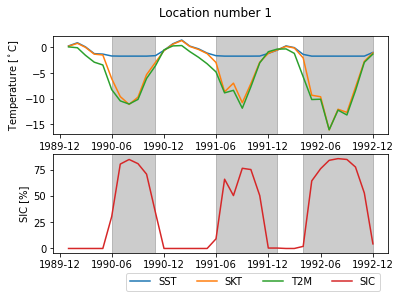

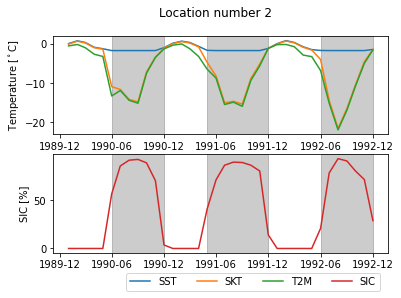

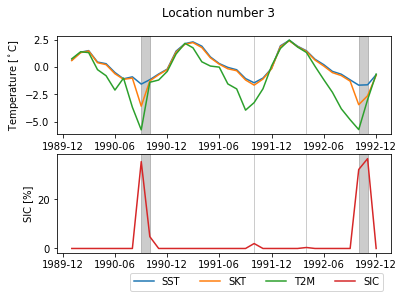

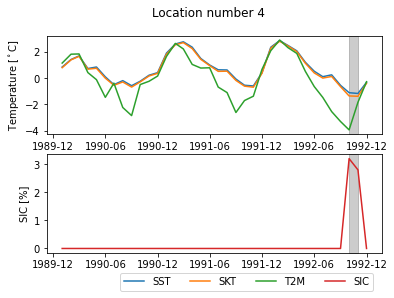

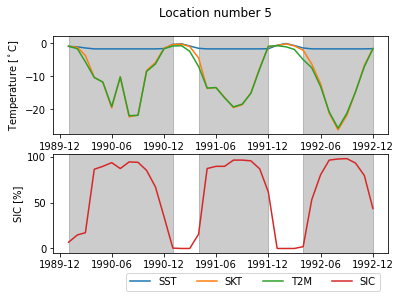

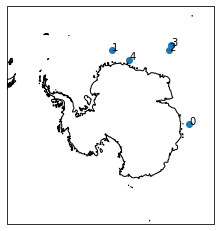

In [2]:
# Checking SST has data when ice is covering

# Load the two datasets
data = w7.load_sst_sic()

# select locations where there is seaice.
# pick some at random and make timeseries plots
w7.select_over_ice_and_plot(data,5)

### Validating temperature between datasets

In order to validate temperature we want to compare the ERA5 data to data from other sources. SST will be verrified against the argo data (need to find where to access this agian).

#### Validating SST Data with ARGO data

In [3]:
# # Acquire ARGO data  and Ensure data is on the same grids
# w7.download_argo_data()

# # Load in the two datasets
# ERA5, ARGO = w7.load_sst_data()

# # Plot mean time series over our relevant areas
# w7.plot_mean_sst_timeseries(ERA5,ARGO)

# # Plot the spatial distribution of trned in data.
# w7.plot_spatial_sst_trends(ERA5,ARGO)

# # Calculate statistics for quality of ocean data.
# stats = w7.generate_sst_statistics(ERA5,ARGO)

#### Validating Air Temperature with station data

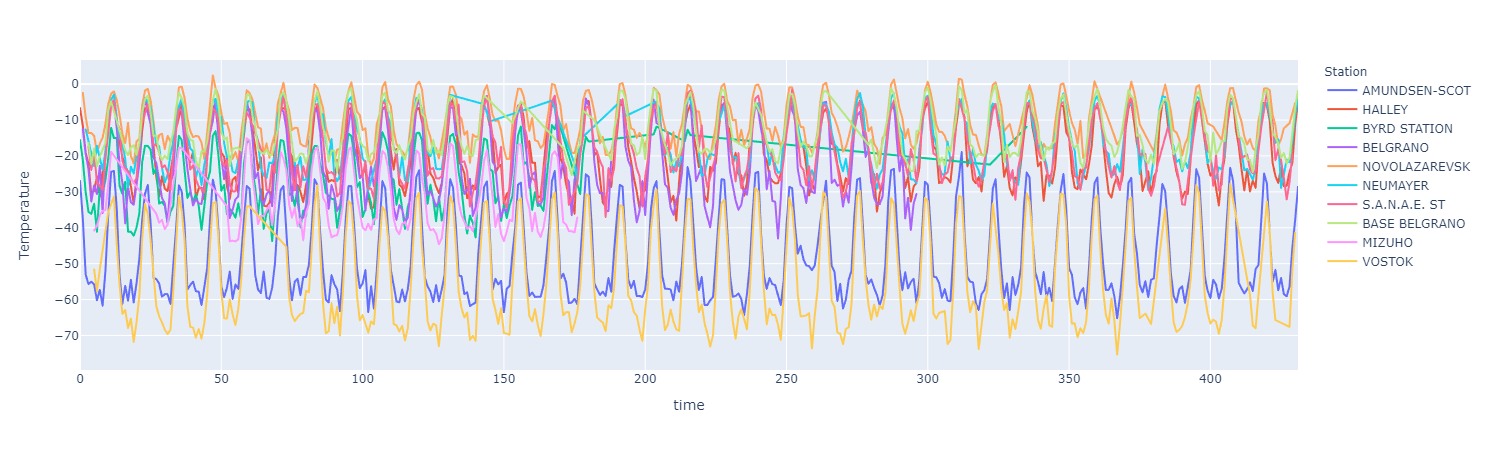

In [43]:
# Load in datasets
T2M, STT = w7.load_air_temp_data()

df = STT.to_dataframe()
df = df.stack()
df = df.reset_index()
df.columns = ['time','Station', 'Temperature']
fig = px.line(df, x="time", y="Temperature", color='Station')
fig.show()


# # Load in datasets
# T2M, STT = w7.load_air_temp_data()


# import plotly.express as px

# df = px.data.gapminder().query("continent=='Oceania'")
# print(df)
# fig = px.line(df, x="year", y="lifeExp", color='country')
# fig.show()


# # Plot timeseries.
# w7.plot_station_timeseries(T2M, STT)

# # # Calculate statistics for station temperature.
# # stats = w7.generate_station_statistics(T2M, STT)

## 2 Predicting temperature from other variables

For this we want to refer to some of the regressions calculated last week. (We will reproduce these here first). Additionally we need to acquire more data and do more regressions against other variables.

### Regressions to do

All of the below variables will be used to predict both SIC and T2M. SIC to confirm that these variables don't directly drive An

    1) Radiation:
        a) SW downwards  
        b) SW net        
        c) LW net        
        d) LW downwards  
        e) LW net        
    
    2) Stratospheric Ozone
    
    3) Climate Indicies
        a) SAM
        b) IPO
        c) DMI, Nino 3.4, MEI v2 less important
        
    4) Environmental variables.
        a) Surface pressure.
        b) Wind speed.

### Radiation predicting SIC

### Radiation predicting 2m Temperature

### Stratospheric Ozone predicting SIC

### Stratospheric Ozone predicting 2m Temperature

### Climate Indicies predicting SIC

### Climate Indicies predicting 2m Temperature

### Environmental Variables predicting SIC

### Environmental Variables predicting 2m Temperature